In [130]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt


In [131]:
products = []
prices = []
ratings = []

In [132]:
sp = requests.get("https://www.flipkart.com/televisions/pr?sid=ckf%2Cczl&p%5B%5D=facets.availability%255B%255D%3DExclude%2BOut%2Bof%2BStock&otracker=categorytree&p%5B%5D=facets.serviceability%5B%5D%3Dtrue&p%5B%5D=facets.brand%255B%255D%3DSamsung&otracker=nmenu_sub_TVs%20%26%20Appliances_0_Samsung")
sp = BeautifulSoup(sp.content, 'html.parser')

In [133]:
for each in sp.find_all('a', href=True, attrs={'class':'_1fQZEK'}):
    name = each.find('div', attrs={'class':'_4rR01T'})
    price = each.find('div', attrs={'class':'_30jeq3 _1_WHN1'})
    rate = each.find('div', attrs={'class':'_3LWZlK'})

In [134]:
    if name is None:
        products.append(None)
    else:
        products.append(name.text)

    if price is None:
        prices.append(None)
    else:
        prices.append(price.text)

    if rate is None:
        ratings.append(None)
    else:
        ratings.append(rate.text)

In [135]:
df = pd.DataFrame({'Product Name': products, 'Price': prices, 'Rating': ratings})
print(df.to_string())

df.to_csv('products.csv', index=False)

df2 = pd.read_csv("products.csv")

                                                           Product Name    Price Rating
0  SAMSUNG Crystal 4K 125 cm (50 inch) Ultra HD (4K) LED Smart Tizen TV  ₹43,990    4.3


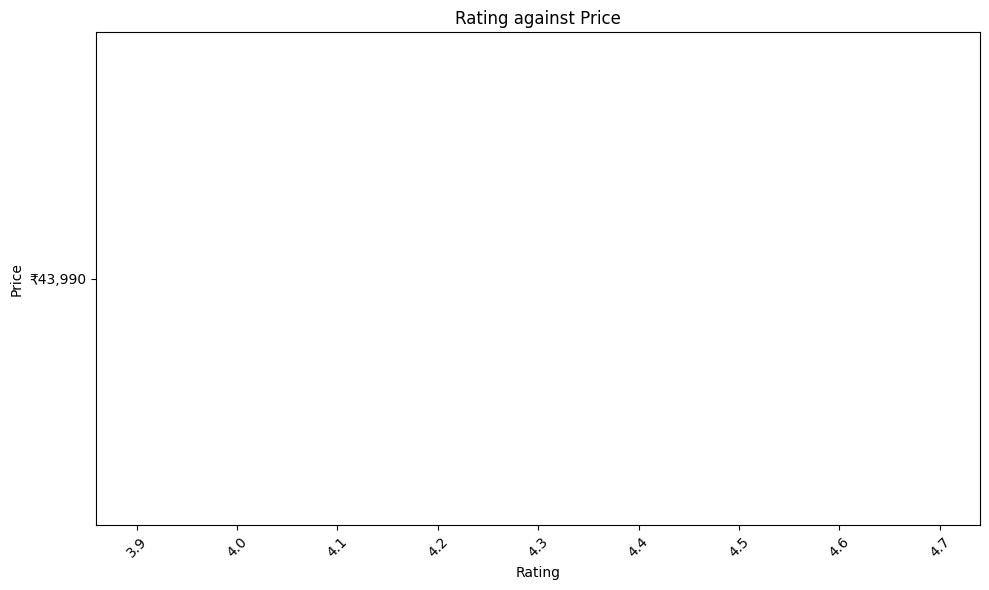

In [136]:
plt.figure(figsize=(10, 6))
plt.bar(df2['Rating'], df2['Price'], color='blue')
plt.xlabel("Rating")
plt.ylabel("Price")
plt.title("Rating against Price")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
